# Assignment 6

Due: **10:00 16 July 2024**

**Online submission** at via github classroom  

# 1. Interpolating a function of one variable **[25 points]**

Load the data in `sparse_1.dat`. You will try to find a smooth the data using interpolation.

**a)** Plot the data. Can you identify the trend? **5 points**

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

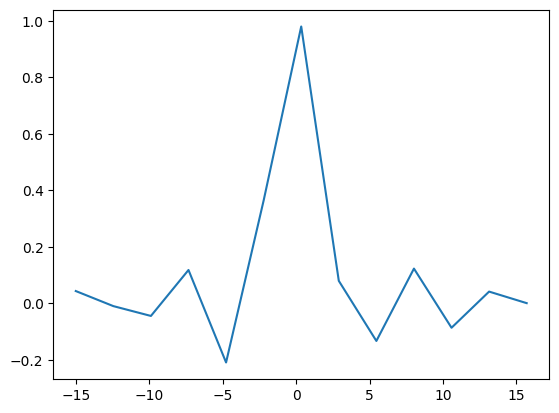

In [2]:
#Read file and fix column names
sparse_1 = pd.read_csv('Data\\sparse_1.dat', sep='(?<!#) ', engine='python')
sparse_1.columns = pd.Series(sparse_1.columns.str.replace('# ', ''))

#Plot data
plt.plot(sparse_1['x'], sparse_1['y'])

#Looks like diffraction/interference or a spike around 0 with a random error

**b)** Smooth the data by interpolating the data at a larger number of $x$-coordinates. You can use the `interp1d` method in `scipy.interpolate` using the linear method (or interpolate the points manually). Plot your interpolated points with the original data points **10 points**

In [3]:
#Import
import scipy.interpolate as ip

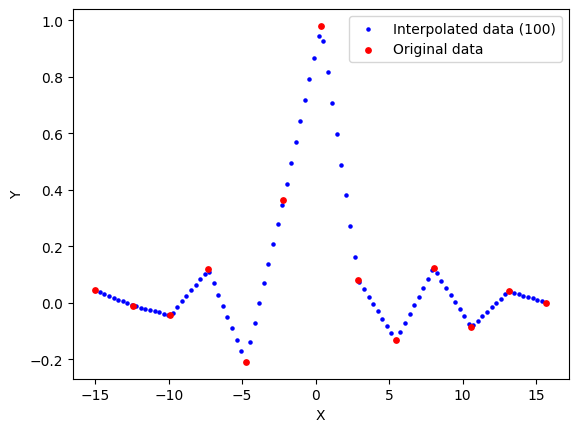

In [4]:
#Create linear Interpolation function from interp1d
def interp(type):
    return ip.interp1d(sparse_1['x'], sparse_1['y'], kind=type)

#Creat linspace (larger number of x coordinates -> 100) for plotting
xrange1d = np.linspace(sparse_1['x'].min(), sparse_1['x'].max(), 100)

#Plot both the interpolated data (100 points evenly spaced) and the original data in a scatter-plot
plt.scatter(xrange1d, interp('linear')(xrange1d), s=5, c='blue', label='Interpolated data (100)')
plt.scatter(sparse_1['x'], sparse_1['y'], s=15, c='red', label='Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

**c)** Test a few other methods ('nearest', 'zero', 'slinear', 'quadratic', and 'cubic') to interpolate the data. Compare them to the linear method. Which appears to be most accurate? Can you identify the underlying function? **10 points**

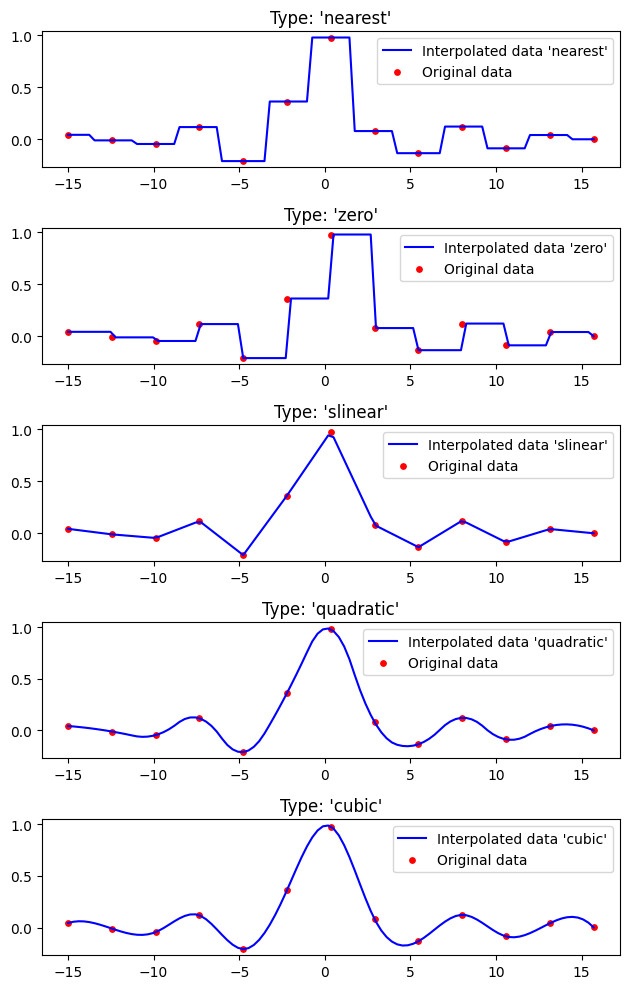

In [5]:
#Define types
interp1d_types = ('nearest', 'zero', 'slinear', 'quadratic', 'cubic')

#Create subplots
fig, ax = plt.subplots(len(interp1d_types))

#Plot each interpolation type
for i in range(len(interp1d_types)):
    ax[i].plot(xrange1d, interp(interp1d_types[i])(xrange1d), c='blue', label='Interpolated data \'' + interp1d_types[i] + '\'')
    ax[i].scatter(sparse_1['x'], sparse_1['y'], s=15, c='red', label='Original data')
    ax[i].title.set_text('Type: \'' + interp1d_types[i] + '\'')
    ax[i].legend()

#Format the plot
fig.set_figheight(10)
fig.tight_layout()

#The data seems to be of the form A*cos(B*x)*exp(-C*x^2), the best fitting interpolation seems to be the quadratic or cubic one

# 2. Using cubic spline for a function of two variables **[25 points]**

Load the data in `data_2.dat`. It contains data in 3 dimensions, where the third dimension is a step function depending on position of the first two.

**a)** The data itself is well-sampled. Verify this by plotting it. **5 points**

In [6]:
#Import libraries
from mpl_toolkits.mplot3d import axes3d

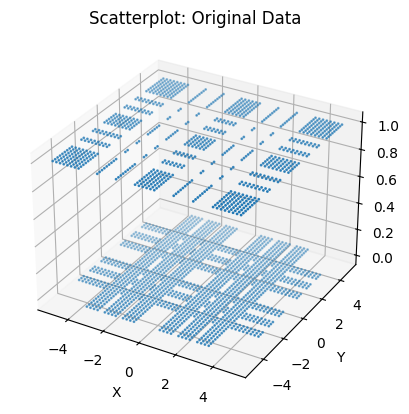

In [7]:
#Load data and fix header
data_2 = pd.read_csv('Data\\data_2.dat', sep='(?<!#) ', engine='python')
data_2.columns = pd.Series(data_2.columns.str.replace('# ', ''))

#Create arrays from data for each dimension
x2d = np.array(data_2['x'])
y2d = np.array(data_2['y'])
z2d = np.array(data_2['z'])

#3D plot the data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Format plot
ax.set_title('Scatterplot: Original Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(x2d, y2d, z2d, s=1)

The data is samples in a grid, evenly spaced so seems well-sampled.

**b)** Now compare the various methods of interpolation using `interp2d()` from `scipy.interpolate` ('linear', 'cubic', 'quintic') by plotting the resulting interpolated grids. Which is the most-accurate method? What are the pros/cons to each method? **20 points**

C:\Users\bbglo\AppData\Local\Temp\ipykernel_10480\486026716.py:15: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_func = ip.interp2d(x2d, y2d, z2d, kind=kind)
C:\Users\bbglo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\interpolate\_interpolate.py:286: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=52,53 m=2500 fp=0.000000 s=0.000000
  self.tck = _fitpack_py.bisplrep(

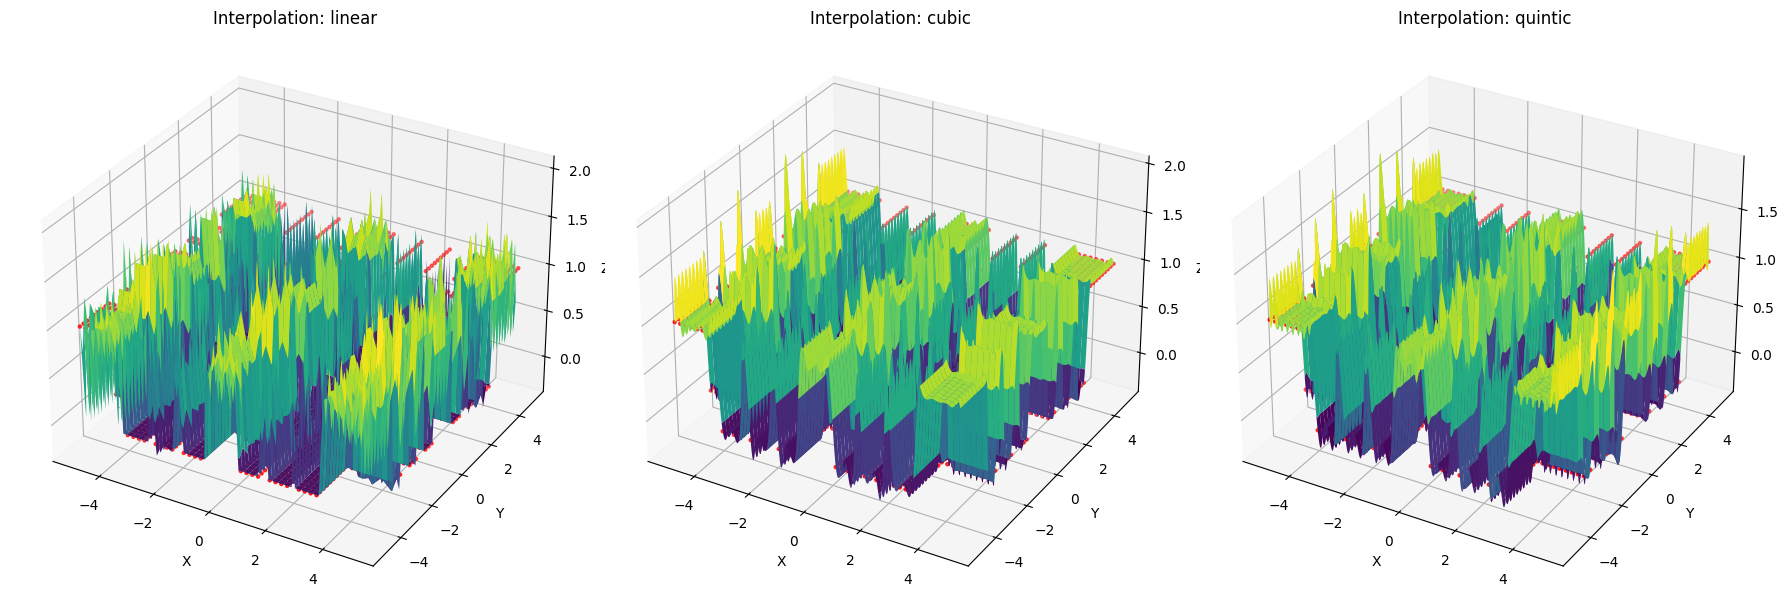

In [8]:
#Set interpolation types
interp2d_types = ['linear', 'cubic', 'quintic']

#Generate grid for plotting
xrange = np.linspace(min(x2d), max(x2d), 500)
yrange = np.linspace(min(y2d), max(y2d), 500)
xrange2d, yrange2d = np.meshgrid(xrange, yrange)

#Create fig
fig = plt.figure(figsize=(18, 6))

#Loop through each interpolation kind
for i, kind in enumerate(interp2d_types):
    #Interpolate 
    interp_func = ip.interp2d(x2d, y2d, z2d, kind=kind)
    z_interp = interp_func(xrange, yrange)
    
    #Create subplots
    ax = fig.add_subplot(1, 3, i+1, projection='3d') #Plot side to side
    ax.plot_surface(xrange2d, yrange2d, z_interp, cmap='viridis') #Plot the interpolations with color for better visibility
    ax.scatter(x2d, y2d, z2d, c='red', s=5)
    ax.set_title(f'Interpolation: {kind}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Show the plot
plt.tight_layout()
plt.show()

Linear seems (visually) and should be the best fit, since we are given z data that can only take two values. It works great for areas with mulpitle data points with value 0 but doesn't capture areas with value 1 or single outliers as well as the other methods.

The cubic interpolation seems to capture outliers and areas with values 1 better, but areas with values 0 worse. Additionally, areas with the same value are not as smooth / locally linear as the linear interpolation.

The qunitic one captures outliers and flat areas both quite well, but has big spikes at the edges of the plot.

# 3. Smoothing a noisy signal **[50 points]**

Load the data in `data_noisy.dat`. Here you will find columns for $x$, $y_1$, and $y_2$. You will investigate how well the data can be smoothed using different filters.

**a)** Apply a moving-average filter to both datasets with $10$- and $20$-point filters. Compare this to $10$- and $20$-point triangular smoothing of both datasets. Discuss the difference between these methods, and how accurate is the interpolated data. Plot any filtered data with the original dataset. **20 points**

In [9]:
#Load data and fix header
data_noisy = pd.read_csv('Data\\data_noisy.dat', sep='(?<!#) ', engine='python')
data_noisy.columns = pd.Series(data_noisy.columns.str.replace('# ', ''))

#Define function to calculate moving average
def calc_MA(array, points):
    series = pd.Series(array) #Convert array to series
    windows = series.rolling(points) #Creat rolling windows
    MA = windows.mean().tolist()[points - 1:] #Calc the mean and transform back to list, dont return NA values
    MA = [MA[0]]*(points-1) + MA #Handle boundries
    return MA 

#Define function to calculate triangular MA
def calc_TMA(data, points):
    triangle = np.concatenate((np.arange(points + 1), np.arange(points)[::-1])) #Create vector with triangle values according to the used points
    smoothed = []

    #Smooth data by multiplying the triangle vector with the corresponding data vector
    for i in range(points, len(data) - points * 2):
        point = data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    #Add the bounry values
    smoothed=[smoothed[0]]*int(points + points/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

#Define function to create MA/TMA data dfs
def createDf(points, kind):
    if kind == 'MA':
        df = pd.DataFrame(np.c_[data_noisy['x'], 
                    calc_MA(data_noisy['y1'], points), 
                    calc_MA(data_noisy['y2'], points)], columns=['x', 'y1', 'y2'])
    elif kind == 'TMA':
        df = pd.DataFrame(np.c_[data_noisy['x'], 
                    calc_TMA(data_noisy['y1'], points), 
                    calc_TMA(data_noisy['y2'], points)], columns=['x', 'y1', 'y2'])
    else:
        print('Worng kind.')

    return df

#Create MA dfs
MA10 = createDf(10, 'MA')
MA20 = createDf(20, 'MA')
TMA10 = createDf(10, 'TMA')
TMA20 = createDf(20, 'TMA')

In [10]:
#Create function for plotting
def plotMA(y1, y2, MA10, MA20, TMA10, TMA20):
    #Create arrays to call upon
    data = [y1, y2] 
    ma_data = [(MA10['y1'], MA20['y1'], TMA10['y1'], TMA20['y1']),
               (MA10['y2'], MA20['y2'], TMA10['y2'], TMA20['y2'])]
    titles = ['MA10', 'MA20', 'TMA10', 'TMA20']

    #Create plot figure and axes
    fig, axs = plt.subplots(4, 2, figsize=(12, 12))

    #Plot each MA/TMA
    for i in range(4):
            for j in range(2):
                axs[i, j].plot(data[j], label=f'y{j+1}') #Plot original data
                axs[i, j].plot(ma_data[j][i], label=titles[i]) #Plot MA/TMA data from array
                axs[i, j].set_title(f'y{j+1} with {titles[i]}') #Set title from array
                axs[i, j].legend()
    plt.tight_layout()
    plt.show()

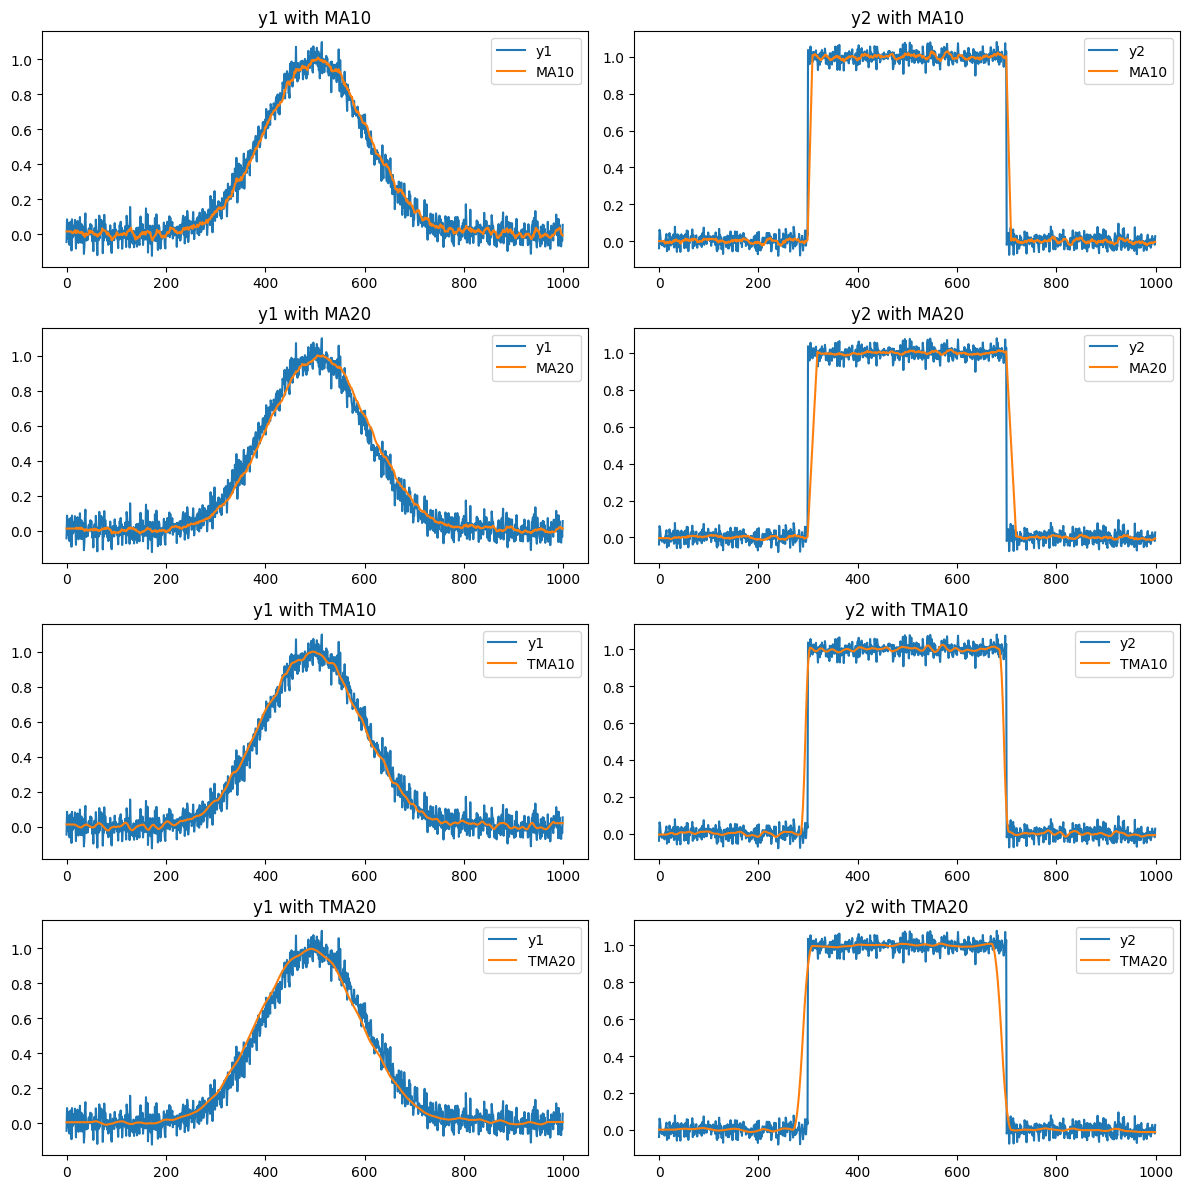

In [11]:
#Plot all smoothed curves incl. the corresponding data
plotMA(data_noisy['y1'], data_noisy['y2'], MA10, MA20, TMA10, TMA20)

The smoothing works well on the noise, especially when using a higher number of points, but also leads to a shift in the data, as well as less precise 'steps' for the y2 data set.
Triangular MA seems to have an even greater smoothing effect even with a lower number of points.
If the data contains peaks or the exact position of a maximum is needed/the point of interest, using the MA/TMA should work great. For precise jumps or peaks or if the exact position of a extremum is needed, there are better alternatives that are more precise.

**b)** Apply the Savitzky-Golay filter to both datasets and plot them. How does this method compare to the previous ones? **30 points**

In [12]:
#Define functions
#Convolution Coefficients
def sgCoeffs(points, order):
    #Create J
    J = np.zeros((points, order + 1)) 

    #Fill J with the numbers according to the degree
    for i in range(points):
        J[i, :] = [(i-points // 2)**k for k in range(order + 1)] 

    #Calculate C th convolution coefficients
    JTJ = np.dot(J.T, J)
    JTJ_inv = np.linalg.inv(JTJ)
    C = np.dot(JTJ_inv, J.T)
    return C[0] #Return the kernel

#Applying filter to data
def sgFilter(data, points, order):
    #Check if points are odd
    if points % 2 == 0:
        print('Please chose an odd number.')
    else:
        half_window = (points - 1) // 2
        coeffs = sgCoeffs(points, order) #Get convolution coeffs from the sgCoeff function
        filtered_data = np.zeros_like(data) #Create output array the same shape as input data
        
        #Apply SG-Filter
        for i in range(len(data)):
            #Only apply onto the data wihtin the point limits
            start = max(0, i - half_window)
            end = min(len(data), i + half_window + 1)
            window_data = data[start:end] 
        
            #If not enough points, fill remaining ones with 0s
            if len(window_data) < points:
                pad_width = points - len(window_data)
                if i < half_window:
                    window_data = np.pad(window_data, (pad_width, 0), mode='constant')
                else:
                    window_data = np.pad(window_data, (0, pad_width), mode='constant')
        
            #Dot product between the filter and data within the points window to get the filtered data
            filtered_data[i] = np.dot(coeffs, window_data)
        return filtered_data

Text(0.5, 1.0, '21-point-5-degree Savitzky-Golay filter with y2 data set')

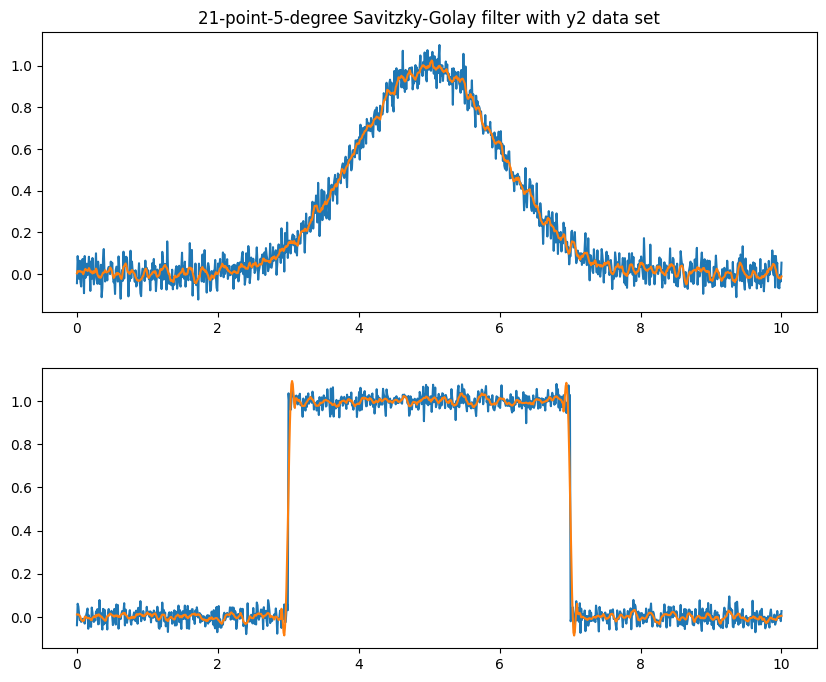

In [13]:
#Set constants
points = 21
degree = 5

#Create figure
fig = plt.figure(figsize=(10,8))

#Create subplots
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

#Plot data
ax1.plot(data_noisy['x'], data_noisy['y1'])
ax1.plot(data_noisy['x'], sgFilter(data_noisy['y1'], points, degree))
ax1.set_title('{a}-point-{b}-degree Savitzky-Golay filter with y1 data set'.format(a=points, b=degree))

ax2.plot(data_noisy['x'], data_noisy['y2'])
ax2.plot(data_noisy['x'], sgFilter(data_noisy['y2'], points, degree))
ax1.set_title('{a}-point-{b}-degree Savitzky-Golay filter with y2 data set'.format(a=points, b=degree))

The SG-filter preserves peaks and jumps much better, as well as does not shift the data. The smoothing, at least when using a similar amount of points is a little worse. Around the jumps in the graphic for y2, there are also smaller peaks that are higher/lower than the noisy data. Around points with jumpy/peaks the SG-filter seems to be more precise when it comes to their location, but creates peaks for the surrounding values, which van lead to problems when the goal is to find the location of extrema.